In [1]:
# Importing the required packages.
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

df = pd.read_csv('automobile.txt', delim_whitespace=False)
temp_df = df

# Enable seeing entire dataset in output.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# -2- DATA CLEANING

In [2]:
# Print list of columns. Return value_counts of each column to show any issues with the data.

# Print list of the columns.
columns_list = temp_df.columns

# Get value counts for columns.
column_value_count = temp_df['price'].value_counts()

# -1- DELETE UNWANTED COLUMNS
temp_df.drop(['symboling', 'normalized-losses', 'bore', 'stroke',
             'compression-ratio'], inplace = True, axis = 1)

# -2- CORRECT MISSPELLING
temp_df.replace('peugot','peugeot')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,140,5500,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,160,5500,16,22,?


# -3- MISSING DATA / VALUES

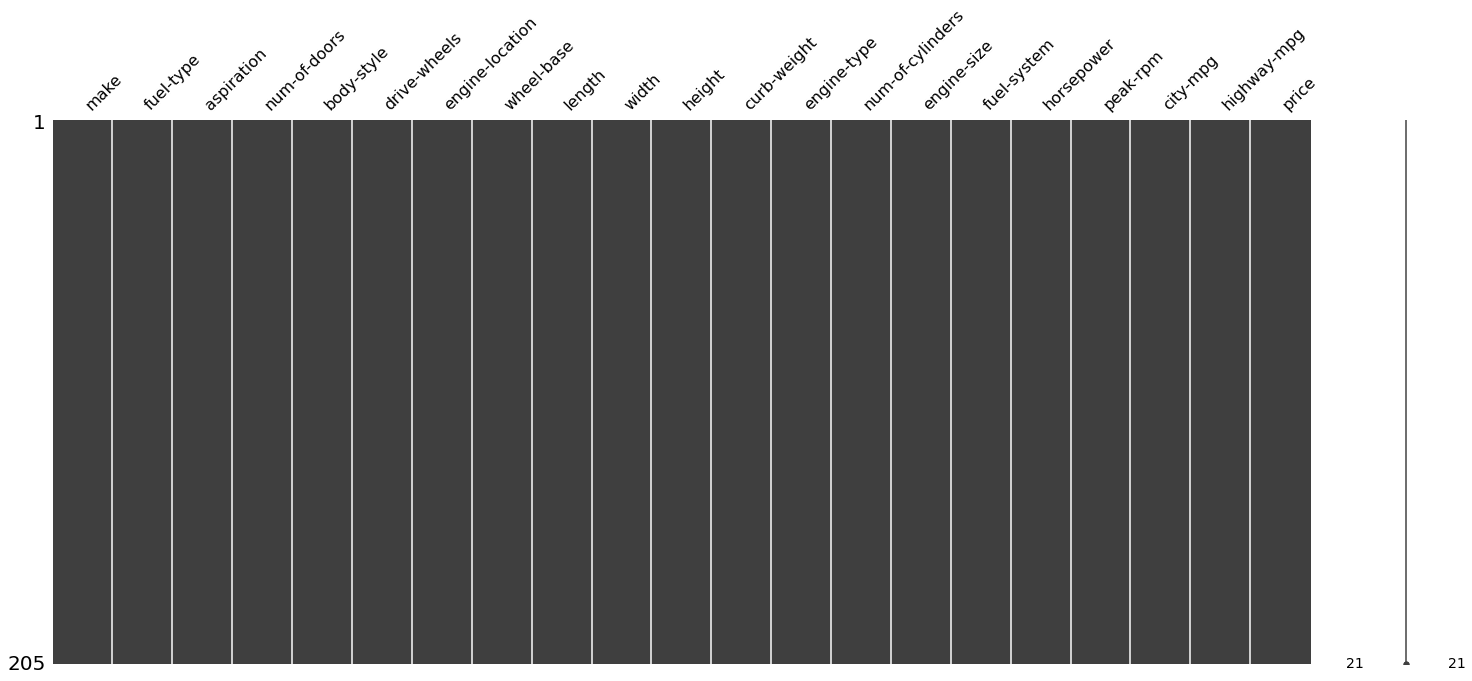

In [3]:
#Plot map using Missingno to visualise any missing values.
msno.matrix(temp_df)

# Show in which columns & rows the '?' character can be found.
temp_df[temp_df.isin(['?'])]

# Replace '?' values in the DataFrame with 0.
temp_df = temp_df.replace('?', 0)

# Convert values in 'price' and 'horsepower' columns from objects to integers.
temp_df['price'] = pd.to_numeric(temp_df['price'], downcast="integer")
temp_df['horsepower'] = pd.to_numeric(temp_df['horsepower'], downcast="integer")

# -4- DATA STORIES AND VISUALIZATIONS

## 4.1 WHICH CARS IN THE DATASET ARE THE MOST POWERFUL AT THE LOWEST PRICE?

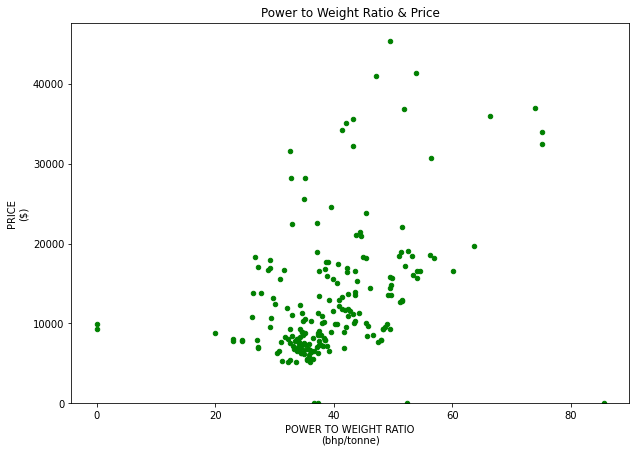

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price,PowerToWeightRatio
75,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,175,5000,19,24,16503,60.137457
105,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,200,5200,17,23,19699,63.714559
129,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,288,5750,17,28,0,85.561497


In [4]:
# POWER TO WEIGHT RATIO-DISTRIBUTION
# Create new Column 'PowerToWeightRatio'. Calculate the horsepower divided 
# by its weight in tonnes. Create histogram and scatterplots as above.

temp_df['PowerToWeightRatio'] = temp_df['horsepower'] / (temp_df['curb-weight']/1000)

# Now plot scatter plot, comparing power to weight ratio to price for all vehicles
# in the DataFrame.
PowWeight= temp_df.PowerToWeightRatio
city_mpg = temp_df['price']

plt.figure(figsize=(10,7))
plt.scatter(x = PowWeight, y = city_mpg, s = 20, c = 'green')
plt.xlabel('POWER TO WEIGHT RATIO\n(bhp/tonne)')
plt.ylabel('PRICE\n($)')
plt.title('Power to Weight Ratio & Price')
plt.ylim(0)
plt.show()

# Filter and output results whose power-to-weight ration is above 60 and whose 
# price is under $20 000.
temp_df[(temp_df['PowerToWeightRatio'] > 60) & (temp_df['price'] <23000)]

## 4.2 DATA EXPLORATION OF BODY STYLES

### 4.2.1 INTRODUCTION

BODY TYPE CATEGORIES:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

BODY TYPE PERCENTAGES: 
SEDAN = 47%
HATCHBACK = 34%
WAGON = 12%
HARDTOP = 4%
CONVERTIBLE = 3%


array([<AxesSubplot:ylabel='engine-location'>], dtype=object)

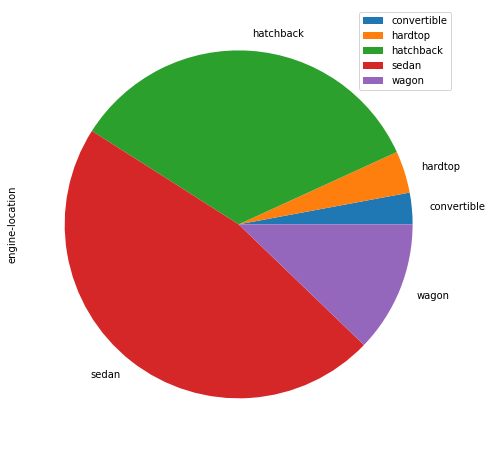

In [5]:
# Get value counts of all body-style categories. 
# Calculate percrentages of each body-style. 
# Use value counts, calculate percentages of each body style category, then print. 
bodystyle_data = temp_df['body-style'].value_counts()
sedan = round(96/205*100)
hatchback = round(70/205*100)
wagon = round(25/205*100)
hardtop = round(8/205*100)
convertible = round(6/205*100)

print('BODY TYPE CATEGORIES:\n' + str(bodystyle_data))
print('\nBODY TYPE PERCENTAGES: ')
print('SEDAN = ' + str(sedan) + '%')
print('HATCHBACK = ' + str(hatchback) + '%')
print('WAGON = ' + str(wagon) + '%')
print('HARDTOP = ' + str(hardtop) + '%')
print('CONVERTIBLE = ' + str(convertible) + '%')

# Plot pie chart.
group_bodystyle = temp_df.groupby(by=['body-style'])
bodystyle_count = group_bodystyle.count()
bodystyle_count = pd.DataFrame(bodystyle_count.iloc[:,5])
bodystyle_count.rename(columns={'make': 'body-style'}, inplace=True)
bodystyle_count.plot.pie(subplots=True,figsize=(8, 8))

### 4.2.2.1 BODY STYLE VS HIGHWAY MPG-(GAS & DIESEL)

<AxesSubplot:xlabel='body-style', ylabel='highway-mpg'>

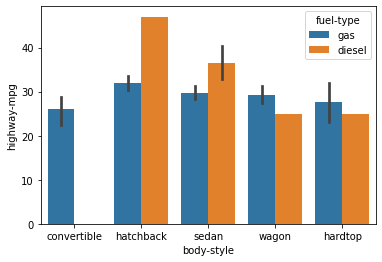

In [6]:
sns.barplot(x="body-style", y="highway-mpg", hue = 'fuel-type',data=temp_df)

### 4.2.2.2 BODY STYLE VS CITY MPG-(GAS & DIESEL)

<AxesSubplot:xlabel='body-style', ylabel='city-mpg'>

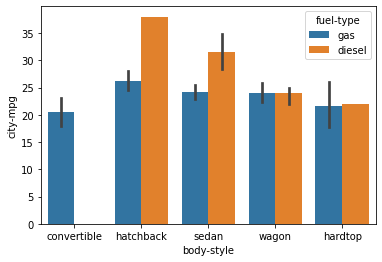

In [7]:
sns.barplot(x="body-style", y="city-mpg", hue = 'fuel-type', data=temp_df)

### 4.2.3 WEIGHT & FUEL CONSUMPTION

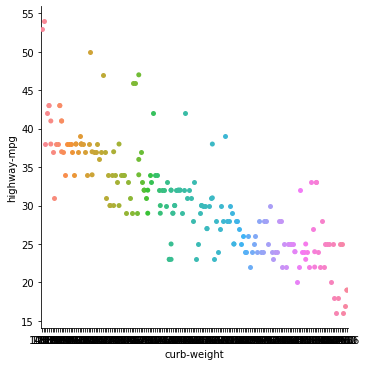

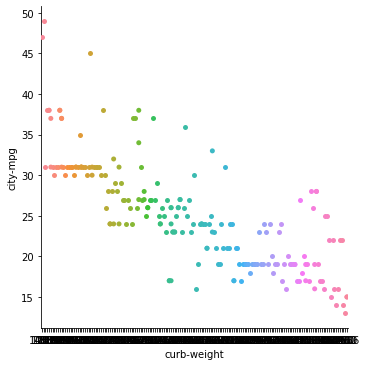

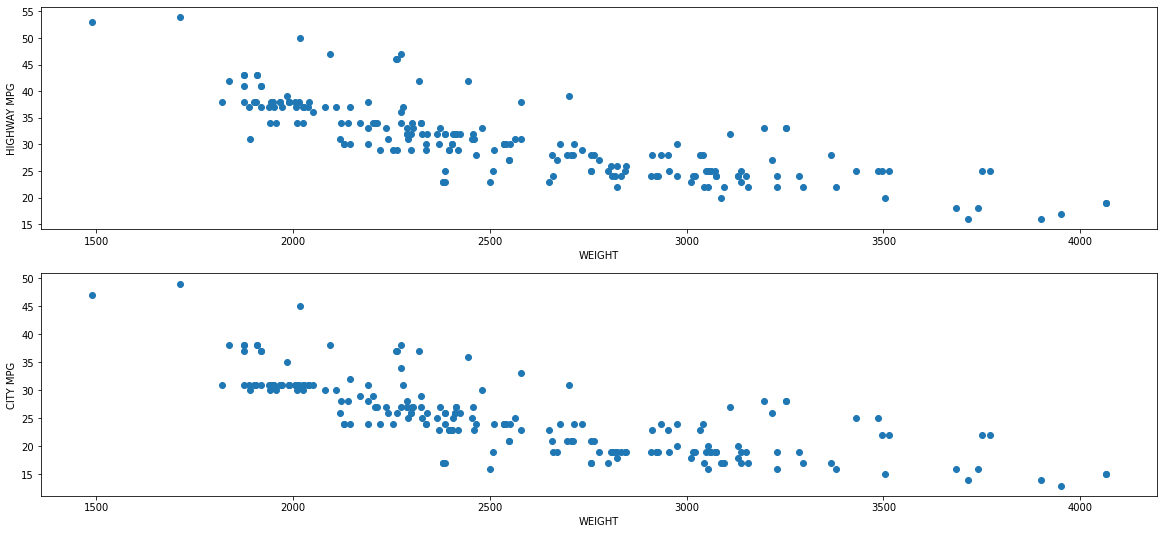

In [8]:
# Plot subplot to get overall picture/trend of distribution of weight/fuel consumption.
sns.catplot(x="curb-weight", y="highway-mpg", jitter=False, data=temp_df)
sns.catplot(x="curb-weight", y="city-mpg", jitter=False, data=temp_df)

# Create subplot of weight vs highway-mpg and weight vs city-mpg.
# Set the dimensions of the two plots, assign relevant variables to the x and y axises
# of the respective axes. Apply labels.
highway_mpg = temp_df['highway-mpg']
weight = temp_df['curb-weight']
city_mpg = temp_df['city-mpg']

fig, ax = plt.subplots(2, figsize=(20, 9))
ax[0].scatter(x = weight, y = highway_mpg)
ax[0].set_xlabel("WEIGHT")
ax[0].set_ylabel("HIGHWAY MPG")

ax[1].scatter(x = weight, y = city_mpg)
ax[1].set_xlabel("WEIGHT")
ax[1].set_ylabel("CITY MPG")
plt.show()

### 4.2.4 BODY STYLE & WEIGHT

<AxesSubplot:xlabel='body-style', ylabel='curb-weight'>

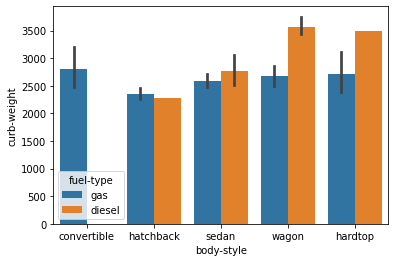

In [9]:
sns.barplot(x="body-style", y="curb-weight", hue = 'fuel-type',data=temp_df)

### 4.2.5 BODY STYLE & HORSEPOWER

<AxesSubplot:xlabel='body-style', ylabel='horsepower'>

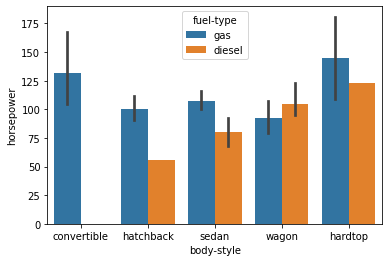

In [12]:
sns.barplot(x="body-style", y="horsepower", hue = 'fuel-type',data=temp_df)

## 4.3 CAVEATS

### FUEL TYPES - GAS vs DIESEL

F U E L   T Y P E

Gas = 90.2439024390244 %
Diesel = 9.75609756097561 %

gas       185
diesel     20
Name: fuel-type, dtype: int64


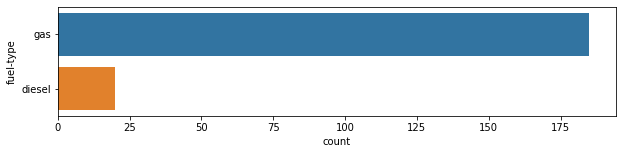

In [13]:
fuel_type_value_count = temp_df['fuel-type'].value_counts()
gas = (185/205*100)
diesel = (20/205*100)

print('F U E L   T Y P E\n')
print('Gas = ' + str(gas) + ' %')
print('Diesel = ' + str(diesel) + ' %\n')
print(fuel_type_value_count)

# Plot bar chart of fuel type.
fig = plt.figure(figsize=(10,2))
sns.countplot(y=temp_df['fuel-type'], data=temp_df);